## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  

Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [88]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

### n_clusters = 2

--- Runtime: 0.02091193199157715 seconds ---


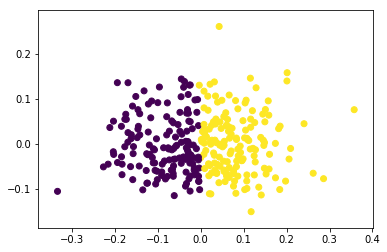

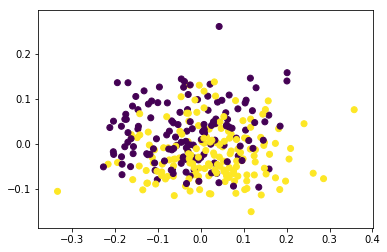

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [90]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

#Calculate start time
import time
start_time = time.time()

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)


#Printing runtime
print("--- Runtime: %s seconds ---" % (time.time() - start_time))



# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

### n_clusters = 3

--- Runtime: 0.028544187545776367 seconds ---
Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


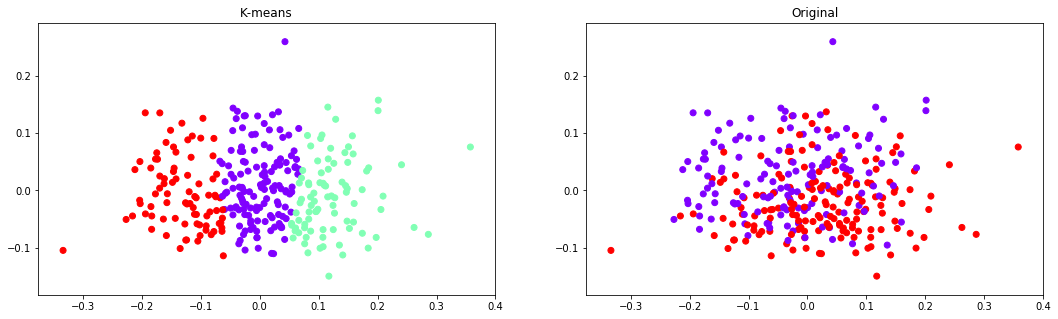

In [91]:
number_clusters = 3

start_time = time.time()

kmeans = KMeans(n_clusters=number_clusters, random_state=42)
kmeans.fit(X_pca)

#Printing runtime
print("--- Runtime: %s seconds ---" % (time.time() - start_time))



plt.figure(figsize=(18,5))


plt.subplot(1,2,1)
plt.title('K-means')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.subplot(1,2,2)
plt.title('Original')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(kmeans.labels_, y))

### n_cliusters = 5

--- Runtime: 0.028242111206054688 seconds ---
Comparing k-means clusters against the data:
13      0   1   2   3  4
row_0                   
0      57   7   2   3  2
1      28  16   8  11  5
2      46  18   8   7  1
3      22   5   5   3  2
4      11   9  13  11  3


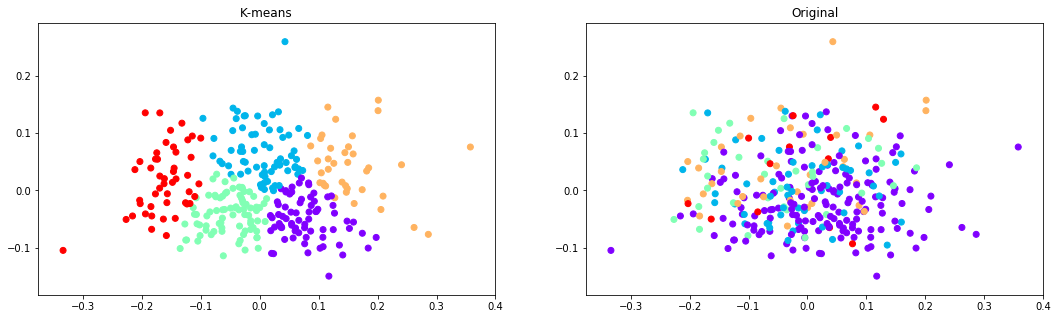

In [92]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.

# Reduce it to two components.
X_pca = PCA(4).fit_transform(X_norm)

#original output
y = df.iloc[:, 13]

number_clusters = 5

start_time = time.time()
kmeans = KMeans(n_clusters=number_clusters, random_state=42)
kmeans.fit(X_pca)

#Printing runtime
print("--- Runtime: %s seconds ---" % (time.time() - start_time))

plt.figure(figsize=(18,5))


plt.subplot(1,2,1)
plt.title('K-means')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.subplot(1,2,2)
plt.title('Original')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(kmeans.labels_, y))

### Conclusions


- It's clear that K-means assume that clusters are symmetrical. In this case, original clusters are not symmetrical and we can verify with scatter plots

- Even if number of clusters is increasing, the model is not good for this problem. In other words, increasing thenumber of cluster does not guarantee better results
